## Stats 211 Problem set 2

John Adeleke

Student Debt, College Prices for Low-income Students and University's Research
Intensiveness 

02/20/2024

### 1. Explain any new or revised hypotheses for interval ratio data from your own project or from Charlie's grant and loan repayment data

[Your answer here should explain:
1. What are your dependent variables? Why do they interest you?
2. What are your independent variables? What direction to you hypothesize will be the relationship between your dependent variable and your dependent variables?
3. Why do you think your dependent variables are associated with your independent variables?
4. What are your control variables? Do you think they will show any spurious, intervening, or interactive relationships? Why?]

If you are working with the grant and loan repayment data, formulate hypotheses about:
1. The relationship between state grant aid per student and the level of research at a university
2. The relationship between loan repayment and college net price for low-income students. The later variable is name **netprice4lowincome**

1. My dependent variables are state grant aid per student and loan payment. As shown in Eaton et al (2020), students at less research intensive find it easier to pay off their debt. Also, state grant aid is dependent on the research intensiveness of the school. 

2. My independent variables are the level of research at a university and college net price for low-income students will have a negative relationship with nonpayment rates of student loans. 

3. It appears logical and also the study titled "The Organizational Ecology of College Affordability: Research Activity, State Grant Aid Policies, and Student Debt at U.S. Public Universities," by Charlie Eaton et al. also point to the association between my dependent and independent variables.

4. The control variables are admission and acceptance rates as shown in the article. The relationship can be said to be intervening because there is no interaction between these control variables and the dependent variables.

Hypotheses

1. Students at high research-intensive public universities have better access to need based state grant aid.

2. Increase in college net price for low income students shapes students ability to repay loan 


### 2. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 
3. create log file 
4. download the data from its source if it's available online
5. read the data in [preferably only variables you are going to use]

In [1]:
cd /Users/johnadeleke/Desktop/Stats2/soc211_assignment

In [2]:
set more off

(-set more- irrelevant in this version of Stata)


In [3]:
log using "Log for Problem Set 2.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Stats2/soc211_assignment/Log for Proble
> m Set 2.log
  log type:  text
 opened on:  19 Feb 2024, 19:36:33


In [4]:
insheet using grants2015_college_affordability20200218.csv, clear

(8 vars, 581 obs)


In [5]:
describe


Contains data
 Observations:           581                  
    Variables:             8                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
year            int     %8.0g                 
instnm          str64   %64s                  
stabbr          str2    %9s                   
control         byte    %8.0g                 
hgroup          str19   %19s                  
highdeg         byte    %8.0g                 
igrnt_low_inc   float   %9.0g                 
sgrnt_low_inc   float   %9.0g                 
-------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


In [6]:
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
}

In [7]:
%head

,year,instnm,stabbr,control,hgroupstring,highdeg,igrnt_low_inc,sgrnt_low_inc,hgrouptemp,hgroup
1,2015,University of Alaska Anchorage,AK,1,Other RU Public,4,3527.888,5126.689,Other RU Public,Some/None
2,2015,University of Alaska Southeast,AK,1,Other RU Public,4,3371.517,3182.448,Other RU Public,Some/None
3,2015,University of Alaska Fairbanks,AK,1,HRA Public,4,6791.518,9233.675,HRA Public,High
4,2015,University of South Alabama,AL,1,HRA Public,4,6839.169,129.9652,HRA Public,High
5,2015,Auburn University-Montgomery,AL,1,Other RU Public,4,2955.426,39.06705,Other RU Public,Some/None


### 3. Create a bar graph with confidence interval whiskers

Create a bar graph that compares interval ratio data for a dependent variable across different nominal categories from an independent variable. If you are using Charlie's data, do this for the state grant aid per low income student variable name **sgrnt_low**

In [8]:
bysort hgroup: egen mn_sgrnt_low_inc=mean(sgrnt_low_inc)

In [9]:
gen sqdv_sgrnt_low_inc=(sgrnt_low_inc-mn_sgrnt_low_inc)^2

In [10]:
collapse ///
(count) n=sgrnt_low_inc ///
(first) mn_sgrnt_low_inc ///
(sum) ssqdv_sgrnt_low_inc= sqdv_sgrnt_low_inc ///
, by(hgroup)

In [11]:
%head

,hgroup,n,mn_sgrnt_low_inc,ssqdv_sgrnt_low_inc
1,Highest,34,6340.64,1.80e+09
2,Very high,37,6196.042,1.58e+09
3,High,72,3874.735,1.20e+09
4,Some/None,438,3109.573,3.13e+09


In [12]:
gen sd_sgrnt_low_inc=sqrt(ssqdv_sgrnt_low_inc/(n-1))

In [13]:
gen se_sgrnt_low_inc= sd_sgrnt_low_inc/sqrt(n-1)

In [14]:
generate hi_sgrnt_low_inc = mn_sgrnt_low_inc + 1.96 * se_sgrnt_low_inc
generate lo_sgrnt_low_inc = mn_sgrnt_low_inc - 1.96 * se_sgrnt_low_inc

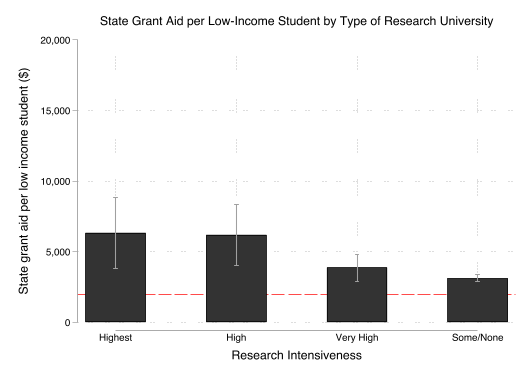

In [15]:
graph twoway (bar mn_sgrnt_low hgroup, barw(.5)) ///
(rcap hi_sgrnt_low lo_sgrnt_low hgroup) , ///
xlabel( 1 "Highest" 2 "High" 3 "Very High" 4 "Some/None", noticks) ///
ytitle("State grant aid per low income student ($)") ///
ylabel(0(5000)20000, format(%10.0fc)) ///
xtitle("Research Intensiveness") legend(off) name(igrntbar, replace) ///
title("State Grant Aid per Low-Income Student by Type of Research University")  ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground)) scheme(plotplainblind)

### 4. Summarize what you learned from the bar graph

Do the confidence intervals overlap across categories or not? What does this mean?

The relationship is not statistically sigificant because of the overlap of the whiskers (confidence intervals). This overlapping shows that there may not be differences in the population means of different universities iwth reseaech intensiveness.

### 4. Estimate OLS regression statistics for the relationship between two interval ratio variables and ouput the table below

If you use Charlie's data, use the loan repayment variable and the **netprice4lowincome** variable.

In [17]:
insheet using loanrepay2013_highestresearch.csv, clear
ds, varwidth(25)

(19 vars, 33 obs)
opeid               stabbr              spend_ugd_4yr_low   instatetuition
acceptrate          hgroup              x_aid_bysticker     xstring
y_lo_inc_rpy        upgrntn             sgrnt_low_inc       ystring
lo_inc_debt_mdn     all_under           igrnt_low_inc       markerlabel
instnm              netprice4lowincome  sandigrnt_low_inc


In [18]:
regress y_lo_inc_rpy netprice4lowincome


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      8.48
       Model |  473.546336         1  473.546336   Prob > F        =    0.0066
    Residual |  1730.93895        31  55.8367402   R-squared       =    0.2148
-------------+----------------------------------   Adj R-squared   =    0.1895
       Total |  2204.48528        32  68.8901651   Root MSE        =    7.4724

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
netprice4l~e |  -.0011662   .0004005    -2.91   0.007    -.0019829   -.0003495
       _cons |   76.56364   3.782187    20.24   0.000     68.84982    84.27746
------------------------------------------------------------------------------


### 5. Interpret the output

1. What is the coefficient for your independent variable? What does it say about the size and direction of the relationship you estimated?

2. What is the p-value for the coefficient for your independent variable? What does it indicate about how much confidence we can have in the estimated relationship?

3. What is the $r^2$ coefficient of determination? What does it say about how much variation in your dependent variable is explained by the independent variable?

4. What is the F-ratio for your $r^2$. What does it indicate about how much confidence we can have in the $r^2$ estimate?



In [ ]:
1. The coefficient for the independent variable, netprice4lowincome, is -.0011662. This shows a very small negative 
relationship between the independent and dependent variable.

2. The p-value is .007, less than .05, which shows that the relationship is statistically significant.

3. As shown in thge output above, the coefficient of determination is .21. This means that 21% of variation in the 
dependent variable is explained by the independent variable.

4. The f-ratiois 8.48 which is larger than 4.16, therefore, we have high confidence in the r-squared value.

### 6. Illustrate the OLS relationship with a scatter plot that includes a fitted line

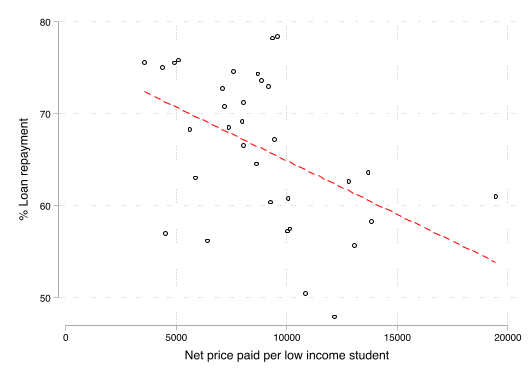

In [19]:
tw (scatter y_lo_inc_rpy netprice4lowincome) ///
(lfit y_lo_inc_rpy netprice4lowincome, color(red)), ///
ytitle("% Loan repayment") ///
xtitle("Net price paid per low income student") legend(off) scheme(plotplainblind)

In [20]:
log close 

      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Stats2/soc211_assignment/Log for Proble
> m Set 2.log
  log type:  text
 closed on:  19 Feb 2024, 20:55:29
-------------------------------------------------------------------------------
